# Titanic Dataset Analysis Assignment


## Part A – Data Exploration (Pandas & Numpy)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset using Pandas

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

### First 10 rows

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Last 10 Rows

In [4]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### The column names and their data types.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  View basic statistics (mean, min, max, etc.).

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing values

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replace missing Age values with the mean age (using Numpy).

In [8]:
data['Age'] = np.where(np.isnan(data['Age'].values) == True  , round(np.mean(data['Age'])) , data['Age'])

### Fill missing Embarked values with the most common port.

In [9]:
temp = 0
for i in data['Embarked'].unique().tolist():
    if temp < data['Embarked'].tolist().count(i):
        temp = data['Embarked'].tolist().count(i)
        check = i
    else:
        continue
data['Embarked'] = np.where(pd.isna(data['Embarked'].values) == True  , check , data['Embarked'])

### How many passengers were onboard?

In [10]:
int(data['PassengerId'].values[-1])

891

### What is the average Age?

In [11]:
float(np.mean(data['Age']))

29.758888888888887

### What is the average Fare?

In [12]:
float(np.mean(data['Fare']))

32.204207968574636

### How many males and females were there?

In [13]:
print(f"Females Count: {data['Sex'].values.tolist().count('female')}")
print(f"Males Count: {data['Sex'].values.tolist().count('male')}")


Females Count: 314
Males Count: 577


## Part B – Data Analysis (Pandas)

### How many survived vs. did not survive?

In [14]:
print(f'Survived: {int(data['Survived'].sum())} and Not Survive: {len(data['Survived'])-int(data['Survived'].sum())}')

Survived: 342 and Not Survive: 549


### What percentage of passengers survived?

In [15]:
print(f"Percentage of passengers survived: {round(int(data['Survived'].sum())/len(data['Survived'])*100 , 1)}%")

Percentage of passengers survived: 38.4%


### Find survival rates for 1st, 2nd, and 3rd class.

In [16]:
group_by_class = data.groupby('Pclass')

for i in data['Pclass'].unique().tolist():
    print(f"Rate of Pclass {i}: {round(group_by_class.get_group(i)['Survived'].sum()/len(group_by_class.get_group(i)['Survived'])*100 , 1)}%")

Rate of Pclass 3: 24.2%
Rate of Pclass 1: 63.0%
Rate of Pclass 2: 47.3%


### Which class had the highest chance of survival?

In [17]:

temp = 0

for i in data['Pclass'].unique().tolist():
    if round(group_by_class.get_group(i)['Survived'].sum()/len(group_by_class.get_group(i)['Survived'])*100 , 1) > temp:
        temp = round(group_by_class.get_group(i)['Survived'].sum()/len(group_by_class.get_group(i)['Survived'])*100 , 1)
        check = i
    else:
        continue
print(f"{check} Class had the highest chance of survival")

1 Class had the highest chance of survival


### Divide passengers into age groups:
- 0–12 = Child
- 13–19 = Teen
- 20–40 = Adult
- 41+ = Senior


### Calculate survival rate for each group.


In [18]:
def divider(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return  'Teen'
    elif age <= 40:
        return  'Adult'
    elif age  > 40:
        return  'Senior'


data["Age Group"] = data['Age'].apply(divider)

group_by_age_class = data.groupby('Age Group')

for i in data['Age Group'].unique().tolist():
    print(f"Rate of Age Group {i}: {round(group_by_age_class.get_group(i)['Survived'].sum()/len(group_by_age_class.get_group(i)['Survived'])*100 , 1)}%")

Rate of Age Group Adult: 36.0%
Rate of Age Group Senior: 36.7%
Rate of Age Group Child: 58.0%
Rate of Age Group Teen: 41.1%


## Part C – Visualization (Matplotlib & Seaborn)

### Bar chart: Number of survivors (0 vs 1).

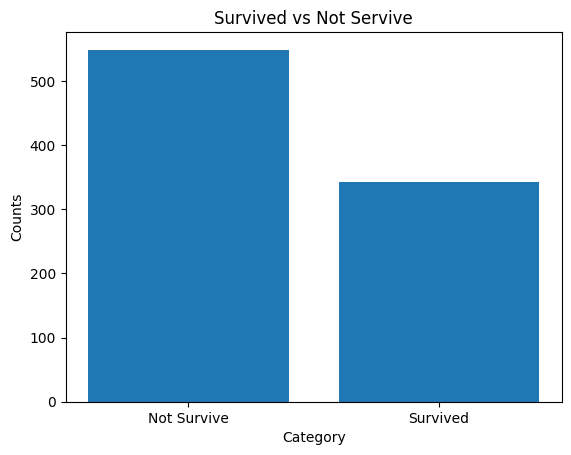

In [19]:
y = data['Survived'].value_counts().values
x = data['Survived'].value_counts().index

plt.bar(x ,  y)
plt.xticks([1,0],["Survived","Not Survive"])
plt.ylabel('Counts')
plt.xlabel('Category')
plt.title('Survived vs Not Servive')
plt.savefig("graph1.jpg", dpi=300)
plt.show()

### Histogram: Distribution of passenger ages (bins = 20).

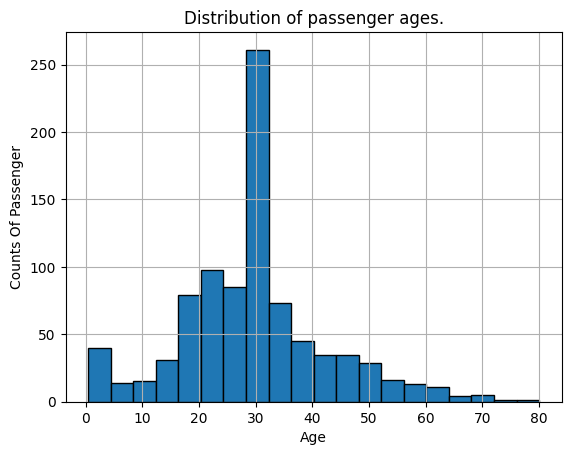

In [20]:
plt.close()
plt.hist(data['Age']  , bins = 20 , edgecolor = 'black')
plt.title('Distribution of passenger ages.')
plt.xlabel('Age')
plt.ylabel('Counts Of Passenger')
plt.grid(True)
plt.savefig("graph2.jpg", dpi=300)
plt.show()

### Pie chart: Gender distribution.

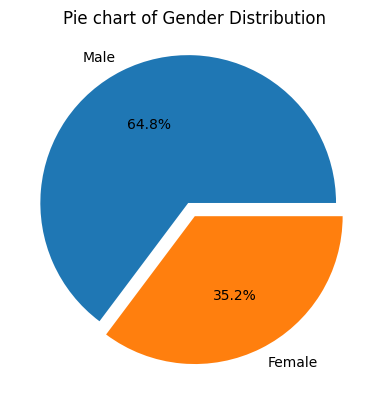

In [21]:
y = data['Sex'].value_counts()
x = data['Sex'].value_counts().index

plt.pie(y , labels= ['Male','Female'] , autopct="%1.1f%%" , explode = [0.1,0])



plt.title('Pie chart of Gender Distribution')
plt.savefig("graph3.jpg", dpi=300)
plt.show()

### Countplot: Survived by Sex (Who survived more?).

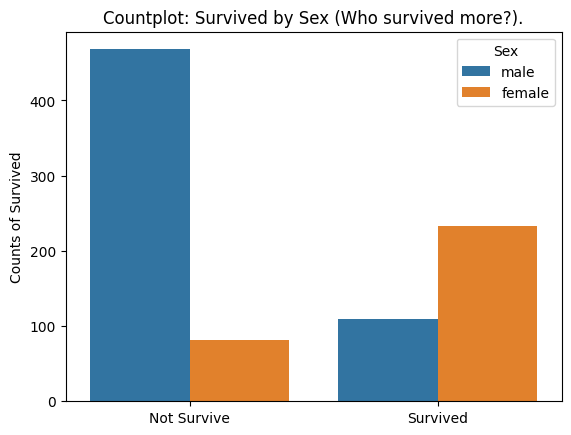

In [22]:
plt.close()
sns.countplot(x = 'Survived' , data = data , hue = 'Sex')
plt.ylabel('Counts of Survived')
plt.xlabel('')
plt.xticks([1,0] , ['Survived' , 'Not Survive'])
plt.title('Countplot: Survived by Sex (Who survived more?).')
plt.savefig("graph4.jpg", dpi=300)
plt.show()

### Boxplot: Fare by Pclass (Which class paid more?).

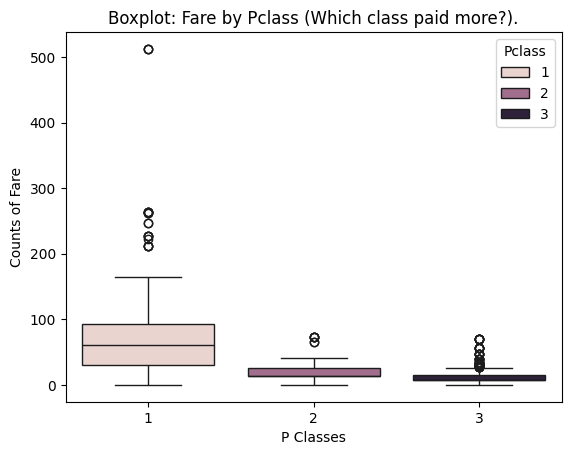

In [23]:
plt.close()
sns.boxplot(data = data , x = 'Pclass' , y = 'Fare' , hue = 'Pclass')
plt.ylabel('Counts of Fare')
plt.xlabel('P Classes')
# plt.xticks([1,2,3] , ['1st' , '2nd' , '3rd'])
plt.title('Boxplot: Fare by Pclass (Which class paid more?).')
plt.savefig("graph5.jpg", dpi=300)
plt.show()

### Violinplot: Age by Survived (Age distribution among survivors).

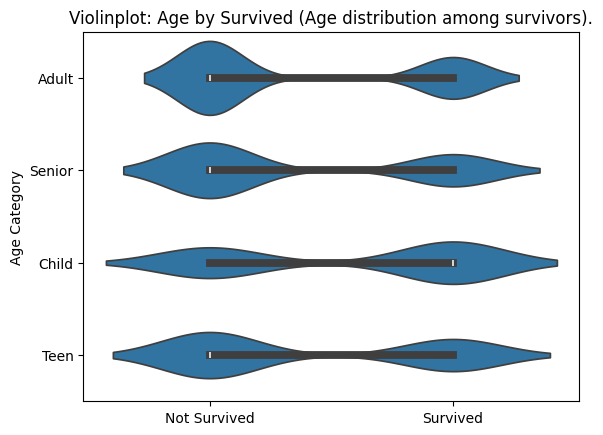

In [24]:
plt.close()
sns.violinplot(data = data , y = 'Age Group' , x = 'Survived')
plt.ylabel('Age Category')
plt.xlabel("")
plt.xticks([0,1],['Not Survived','Survived'])
plt.title('Violinplot: Age by Survived (Age distribution among survivors).')
plt.savefig("graph6.jpg", dpi=300)
plt.show()

### Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).

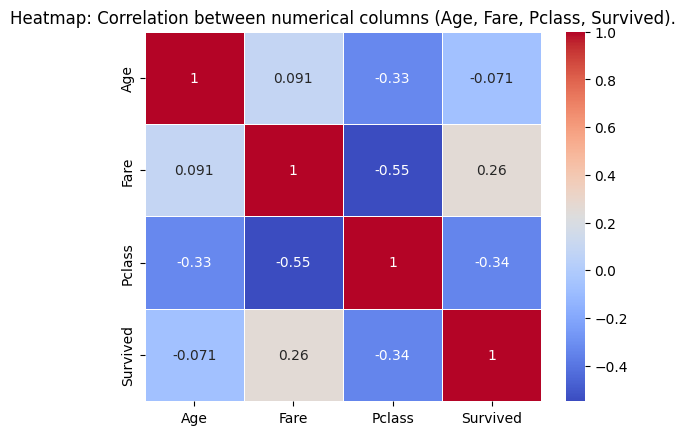

In [25]:
plt.close()

num_cols = ["Age", "Fare", "Pclass", "Survived"]

corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title('Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).')
plt.savefig("graph7.jpg", dpi=300)
plt.show()

## Part D – Probability Concepts

## Empirical Probability

### Probability a passenger survived

In [26]:
print(f"Probability a passenger survived: {float(data['Survived'].sum()/len(data['Survived']))}")

Probability a passenger survived: 0.3838383838383838


### Probability a female survived

In [27]:
group_by_gender = data.groupby('Sex')

print(f"Probability a female survived: {float(group_by_gender.get_group('female')['Survived'].sum()/len(group_by_gender.get_group('female')['Survived']))}")

Probability a female survived: 0.7420382165605095


### Probability a male survived

In [28]:
print(f"Probability a male survived: {float(group_by_gender.get_group('male')['Survived'].sum()/len(group_by_gender.get_group('male')['Survived']))}")

Probability a male survived: 0.18890814558058924


### Compare probabilities across Pclass. 
1. Probability a passenger survived
2. Probability a female survived
3. Probability a male survived

### 1. Probability a passenger survived

In [29]:
print(f"Probability a passenger survived PClass 1: {float(group_by_class.get_group(1)['Survived'].sum()/len(group_by_class.get_group(1)['Survived']))}")
print(f"Probability a passenger survived PClass 2: {float(group_by_class.get_group(2)['Survived'].sum()/len(group_by_class.get_group(2)['Survived']))}")
print(f"Probability a passenger survived PClass 3: {float(group_by_class.get_group(3)['Survived'].sum()/len(group_by_class.get_group(3)['Survived']))}")

Probability a passenger survived PClass 1: 0.6296296296296297
Probability a passenger survived PClass 2: 0.47282608695652173
Probability a passenger survived PClass 3: 0.24236252545824846


### 2. Probability a female survived

In [30]:
group_by_class.get_group(1).groupby('Sex')
print(f"Probability a female survived PClass 1: {float(group_by_class.get_group(1).groupby('Sex').get_group('female')['Survived'].sum()/len(group_by_class.get_group(1).groupby('Sex').get_group('female')['Survived']))}")
print(f"Probability a female survived PClass 2: {float(group_by_class.get_group(2).groupby('Sex').get_group('female')['Survived'].sum()/len(group_by_class.get_group(2).groupby('Sex').get_group('female')['Survived']))}")
print(f"Probability a female survived PClass 3: {float(group_by_class.get_group(3).groupby('Sex').get_group('female')['Survived'].sum()/len(group_by_class.get_group(3).groupby('Sex').get_group('female')['Survived']))}")

Probability a female survived PClass 1: 0.9680851063829787
Probability a female survived PClass 2: 0.9210526315789473
Probability a female survived PClass 3: 0.5


### 3. Probability a male survived

In [31]:
print(f"Probability a male survived PClass 1: {float(group_by_class.get_group(1).groupby('Sex').get_group('male')['Survived'].sum()/len(group_by_class.get_group(1).groupby('Sex').get_group('male')['Survived']))}")
print(f"Probability a male survived PClass 2: {float(group_by_class.get_group(2).groupby('Sex').get_group('male')['Survived'].sum()/len(group_by_class.get_group(2).groupby('Sex').get_group('male')['Survived']))}")
print(f"Probability a male survived PClass 3: {float(group_by_class.get_group(3).groupby('Sex').get_group('male')['Survived'].sum()/len(group_by_class.get_group(3).groupby('Sex').get_group('male')['Survived']))}")

Probability a male survived PClass 1: 0.36885245901639346
Probability a male survived PClass 2: 0.1574074074074074
Probability a male survived PClass 3: 0.13544668587896252


## Theoretical Probability

### Theoretical Probability VS Empirical Probability

In [32]:
empirical = {
    "Pclass 1 Survival": float(group_by_class.get_group(1)['Survived'].sum() / len(group_by_class.get_group(1)['Survived'])),
    "Pclass 2 Survival": float(group_by_class.get_group(2)['Survived'].sum() / len(group_by_class.get_group(2)['Survived'])),
    "Pclass 3 Survival": float(group_by_class.get_group(3)['Survived'].sum() / len(group_by_class.get_group(3)['Survived'])),

    "Female Pclass 1 Survival": float(group_by_class.get_group(1).groupby('Sex').get_group('female')['Survived'].sum() / len(group_by_class.get_group(1).groupby('Sex').get_group('female')['Survived'])),
    "Female Pclass 2 Survival": float(group_by_class.get_group(2).groupby('Sex').get_group('female')['Survived'].sum() / len(group_by_class.get_group(2).groupby('Sex').get_group('female')['Survived'])),
    "Female Pclass 3 Survival": float(group_by_class.get_group(3).groupby('Sex').get_group('female')['Survived'].sum() / len(group_by_class.get_group(3).groupby('Sex').get_group('female')['Survived'])),

    "Male Pclass 1 Survival": float(group_by_class.get_group(1).groupby('Sex').get_group('male')['Survived'].sum() / len(group_by_class.get_group(1).groupby('Sex').get_group('male')['Survived'])),
    "Male Pclass 2 Survival": float(group_by_class.get_group(2).groupby('Sex').get_group('male')['Survived'].sum() / len(group_by_class.get_group(2).groupby('Sex').get_group('male')['Survived'])),
    "Male Pclass 3 Survival": float(group_by_class.get_group(3).groupby('Sex').get_group('male')['Survived'].sum() / len(group_by_class.get_group(3).groupby('Sex').get_group('male')['Survived']))
}


theoretical = {key: 0.5 for key in empirical.keys()}


df = pd.DataFrame({
    "Empirical Probability": empirical,
    "Theoretical Probability": theoretical
})

df

,Empirical Probability,Theoretical Probability
Pclass 1 Survival,0.629630,0.5
Pclass 2 Survival,0.472826,0.5
Pclass 3 Survival,0.242363,0.5
Female Pclass 1 Survival,0.968085,0.5
Female Pclass 2 Survival,0.921053,0.5
Female Pclass 3 Survival,0.500000,0.5
Male Pclass 1 Survival,0.368852,0.5
Male Pclass 2 Survival,0.157407,0.5
Male Pclass 3 Survival,0.135447,0.5


# The End